File money_laudering results.


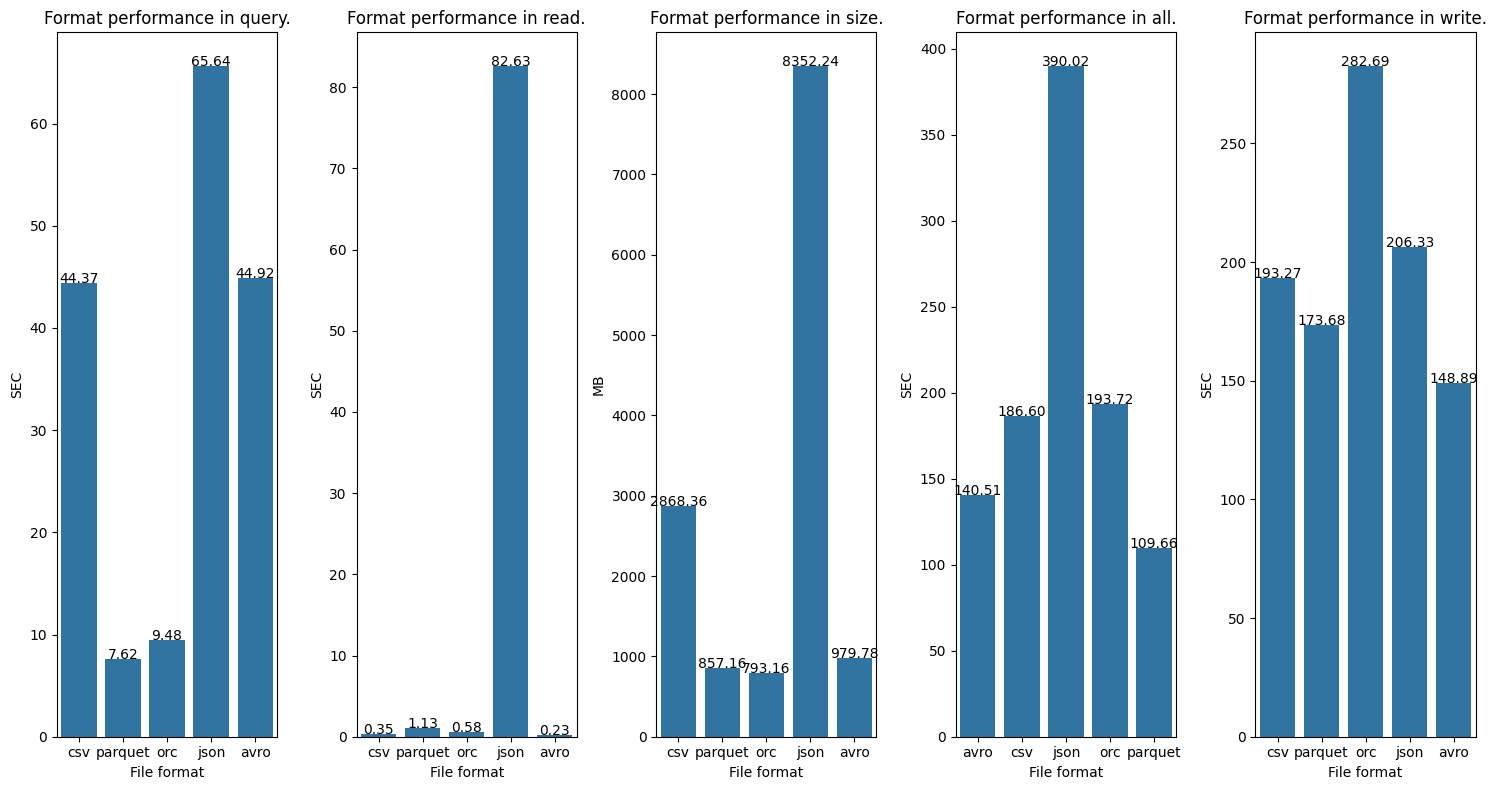

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

dfResults = pd.read_csv(r'results.csv')

files = list(set(dfResults['file']))

for file in files:
    fig, axs = plt.subplots(nrows=1, ncols=len(operations) , figsize=(18, 8))
    
    print(f"File {file} results.")
    dfFile = dfResults[dfResults['file']==file]
    
    operations = list(set(dfFile['operation']))

    
    for i, operation in enumerate(operations):
        newDfFile = dfFile.groupby(['format','operation'])['value'].mean().reset_index()
        dfResultsPlot = dfFile[dfFile['operation'] == operation]
        ax = sns.barplot(data=dfResultsPlot, x='format', y='value', errorbar=None, ax=axs[i])
        ax.set(xlabel='File format', ylabel=list(dfResultsPlot['measure'])[0].upper(), title=f"Format performance in {operation}.")
        
        for p in ax.patches:
            ax.text(p.get_x() + p.get_width() / 2., p.get_height(), f'{p.get_height():.2f}', ha='center', va='baseline')
    
    plt.tight_layout()
    
    plt.show()